In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
n_unique_ids = 100
rows_per_id = 10
n_rows = rows_per_id * n_unique_ids
mu, sigma = 100, 10

s1, s2 = np.random.normal(mu, sigma, (2, n_rows))
s1.sort()
s2.sort()

<Axes: ylabel='Density'>

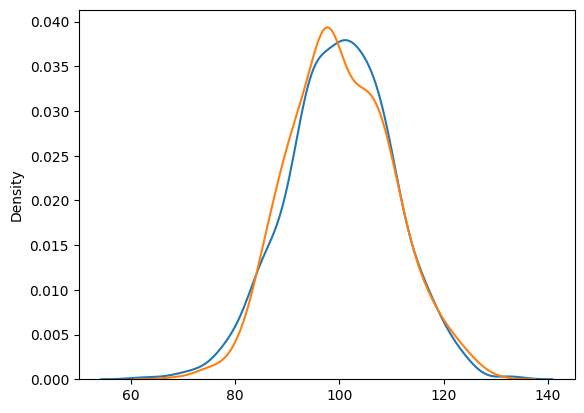

In [5]:
sns.kdeplot(s1)
sns.kdeplot(s2)

In [7]:
min(s1), max(s1)

(61.95403936128728, 133.22282039095876)

In [10]:
s1[0], s1[-1]

(61.95403936128728, 133.22282039095876)

In [48]:
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

In [49]:
res = []
for i in range(n_unique_ids):
    start = i * rows_per_id
    end = (i+1) * rows_per_id
    vals = s1[start:end]
    for x in vals:
        date = random_date(start_dt, end_dt)
        res.append([i, x, date])
np.random.shuffle(res)

In [50]:
df = pd.DataFrame(res, columns=["user_id", "money", "date"])
df.head(20)

,user_id,money,date
0,59,102.651427,2023-01-22 20:10:45
1,68,105.457340,2023-01-18 05:01:13
2,90,113.404895,2023-01-01 19:27:14
3,96,118.348607,2023-01-13 08:16:44
4,70,105.711965,2023-01-17 04:00:22
5,15,90.097946,2023-01-25 20:27:04
6,43,98.593535,2023-01-20 11:12:28
7,19,92.040911,2023-01-14 02:09:28
8,57,102.249764,2023-01-21 08:05:01
9,33,95.903931,2023-01-15 19:43:43


In [57]:
from random import randrange
from datetime import timedelta
from datetime import datetime

def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

In [58]:
def get_normal(n_rows: int, mu: float, sigma: float):
    s1, s2 = np.random.normal(mu, sigma, (2, n_rows))
    s1.sort()
    s2.sort()
    return s1, s2

In [69]:
def generate_data(n_unique_ids: int, n_rows_per_id: int, mu: float, sigma: float, start_dt, end_dt):
    total_rows = n_rows_per_id * n_unique_ids

    sample_1, sample_2 = get_normal(total_rows, mu, sigma)

    df_1 = []
    df_2 = []
    for i in range(n_unique_ids):
        start = i * rows_per_id
        end = (i+1) * rows_per_id
        vals_1 = sample_1[start:end]
        vals_2 = sample_2[start:end]
        for x in vals_1:
            date = random_date(start_dt, end_dt)
            df_1.append([i, x, date])
        for x in vals_2:
            date = random_date(start_dt, end_dt)
            df_2.append([i, x, date])  
    np.random.shuffle(df_1)
    np.random.shuffle(df_2)

    return pd.DataFrame(df_1, columns=["user_id", "money", "date"]), pd.DataFrame(df_2, columns=["user_id", "money", "date"])

In [70]:
n_unique_ids = 100
rows_per_id = 10
mu, sigma = 100, 20
start_dt = datetime.strptime("2023/01/01", "%Y/%m/%d")
end_dt = datetime.strptime("2023/02/01", "%Y/%m/%d")

In [71]:
df_1, df_2 = generate_data(
    n_unique_ids, rows_per_id, mu, sigma, start_dt, end_dt
)

In [72]:
df_1.head()

,user_id,money,date
0,64,107.715866,2023-01-08 10:07:30
1,48,100.293384,2023-01-27 00:02:25
2,52,102.762780,2023-01-15 07:06:43
3,89,126.989778,2023-01-22 21:39:36
4,46,99.020131,2023-01-30 19:49:14


In [73]:
df = pd.concat([df_1, df_2])

<Axes: ylabel='Density'>

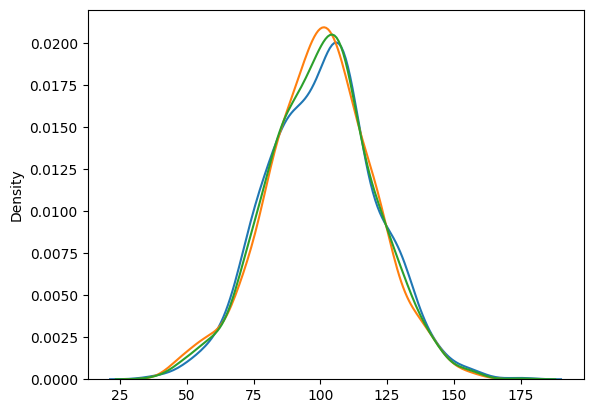

In [74]:
sns.kdeplot(df_1["money"].to_list())
sns.kdeplot(df_2["money"].to_list())
sns.kdeplot(df["money"].to_list())